## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studyData = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
studyData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
len(studyData["Mouse ID"].unique())

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse = studyData.loc[studyData.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicateMouse

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseData = studyData.loc[studyData["Mouse ID"] == "g989"]
duplicateMouseData


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanStudy = studyData[studyData["Mouse ID"].isin(duplicateMouse)==False]
cleanStudy.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice in the clean DataFrame.
len(cleanStudy["Mouse ID"].unique())

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [17]:
means = cleanStudy.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = cleanStudy.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances = cleanStudy.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sds = cleanStudy.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = cleanStudy.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


summaryTable = pd.DataFrame({
    "Mean Tumor Volume" : means,
    "Median Tumor Volume" : medians,
    "Tumor Volume Variance" : variances,
    "Tumor Volume Std. Dev." : sds,
    "Tumor Volume Std. Err." : sems
})

summaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleanStudy.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

summaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [22]:
counts = cleanStudy["Drug Regimen"].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

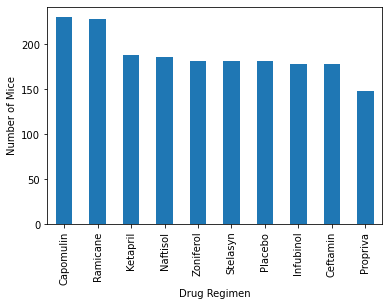

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = cleanStudy["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()


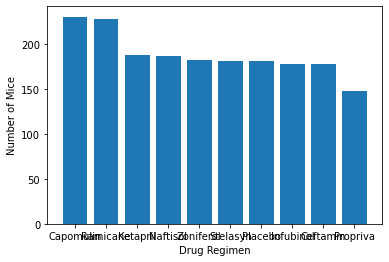

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(counts.index.values, counts.values)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

In [27]:
counts = cleanStudy["Sex"].value_counts()
counts

Male      958
Female    922
Name: Sex, dtype: int64

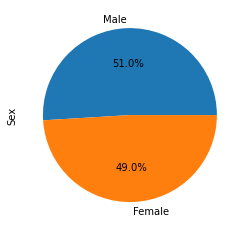

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

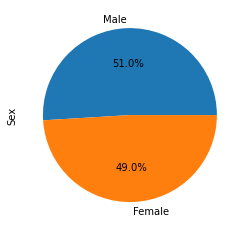

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Start by getting the last (greatest) timepoint for each mouse
lastTumorVolume = cleanStudy.groupby("Mouse ID")["Timepoint"].max()
lastTumorVolume = lastTumorVolume.reset_index()
lastTumorVolume.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleanMergedDF = lastTumorVolume.merge(cleanStudy, on=["Mouse ID", "Timepoint"], how="left")
cleanMergedDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [33]:
print(cleanMergedDF["Drug Regimen"].unique())

['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
drugregimenList = ['Infubinol','Placebo','Ceftamin','Stelasyn','Zoniferol','Ramicane',
 'Ketapril','Propriva','Naftisol','Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvolumeList = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for r in drugregimenList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalTumorVolumeCount = cleanMergedDF.loc[cleanMergedDF["Drug Regimen"]== r, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorvolumeList.append(finalTumorVolumeCount)
    
    # Determine outliers using upper and lower bounds
    quartiles = finalTumorVolumeCount.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = finalTumorVolumeCount.loc[(finalTumorVolumeCount < lowerbound) | (finalTumorVolumeCount > upperbound)]
    print(f"{r}'s potential outliers: \n{outliers}")

Infubinol's potential outliers: 
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Placebo's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)


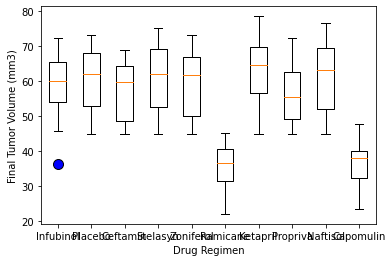

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_out = dict(markerfacecolor="blue", markersize=10)
plt.boxplot(tumorvolumeList, labels=drugregimenList, flierprops=blue_out)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [49]:
# generate a table of all mice filtered out by the Capomulin
capomulinTable = cleanStudy.loc[cleanStudy["Drug Regimen"]=="Capomulin"]
capomulinTable.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


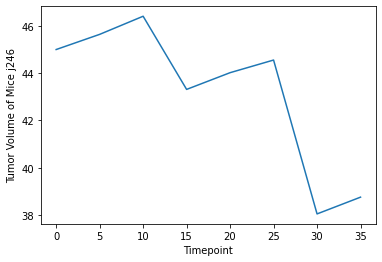

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#pick a mouse treated with Capomulin
mouseData = capomulinTable.loc[capomulinTable["Mouse ID"]=="j246"]
plt.plot(mouseData["Timepoint"], mouseData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume of Mice j246")
plt.show()

In [54]:
capomulinAverage = capomulinTable.groupby("Mouse ID").mean()
capomulinAverage.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


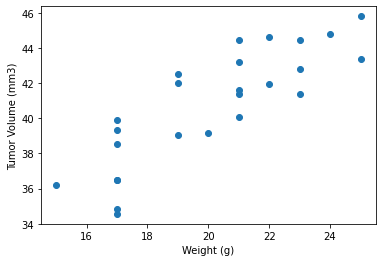

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulinAverage["Weight (g)"], capomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

the corrleation between mouse weight and average tumor volume is  0.84
LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)


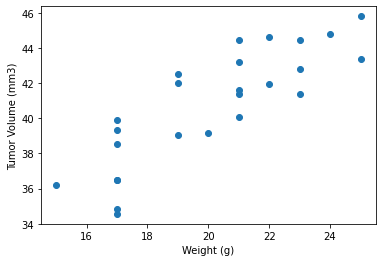

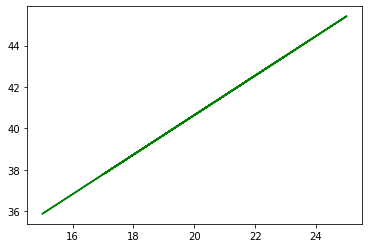

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# correlation determines if there is a positive, negative or no relationship between the variables
# positive number = positive relationship
# negative number = negative relationship
# number close to 0 = little to no relationship
correlation = round(st.pearsonr(capomulinAverage["Weight (g)"], capomulinAverage["Tumor Volume (mm3)"])[0], 2)
print(f"the corrleation between mouse weight and average tumor volume is {correlation: .2f}")

#model # gets the y = mx + b
    #index 0 is the slope,
    #index 1 is the y intercept
    
    #calculate the y values for the linear regression model using the slope intercept equation
    #objective is to display the trendline on the plot of the average weight v. average tumor vol graph
model = st.linregress(capomulinAverage["Weight (g)"], capomulinAverage["Tumor Volume (mm3)"])
print(model)

yValues = capomulinAverage["Weight (g)"] * model[0] + model[1]

# create the scatter plot again
plt.scatter(capomulinAverage["Weight (g)"], capomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

#draw the line with the linear regression line on the plot
plt.plot(capomulinAverage["Weight (g)"], yValues, color="green")
plt.show()